<a href="https://colab.research.google.com/github/MasahikoAtsumi/deep_lec/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

学習のフェーズについて学ぶ…
スライドで説明したようにまず機械は傾向について学ばなければならない…

0 - airplane

1 - automobile

2 - bird

3 - cat

4 - deer

5 - dog

6 - frog

7 - horse

8 - ship

9 - truck 

とりあえず、分類する画像を見てみよう…




In [ ]:
'''
画像は32x32のRGBです。画像の上に表示されている数字が正解ラベル。

0 - airplane
1 - automobile
2 - bird
3 - cat
4 - deer
5 - dog
6 - frog
7 - horse
8 - ship
9 - truck

ラベルはこのようになっています。
'''

from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

#5x5枚の画像を表示する
plt.figure(figsize=(10,10))
for i in range(25):
    rand_num=np.random.randint(0,50000)
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(x_train[rand_num])
    #x軸の目盛りを消す
    plt.tick_params(labelbottom='off')
    #y軸の目盛りを消す
    plt.tick_params(labelleft='off')
    #正解ラベルを表示
    plt.title(y_train[rand_num])


plt.show()

以上の10種類の画像を分類できるか？

次のコードで機械が学んでいく…

In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.datasets import cifar10
from keras.utils import np_utils

#cifar10をダウンロード
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

#画像を0-1の範囲で正規化
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

#正解ラベルをOne-Hot表現に変換
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

#Difine the model
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,batch_size=128,epochs=20,verbose=1,validation_split=0.1)

#モデルと重みを保存
json_string=model.to_json()
open('cifar10_cnn.json',"w").write(json_string)
model.save_weights('cifar10_cnn.h5')

#モデルの表示
model.summary()

#評価
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])
#save
json_string=model.to_json()
open('cifar10_cnn.json',"w").write(json_string)

model.save_weights('cifar10_cnn.h5')

ファイルを確認してほしい。
.h5が生成させれているのがわかる。これが学習の結果得られたパラメータの集合である。

次のフェーズでは、推論つまり、学習の結果得られたパラメータを利用し、入力画像をあてることができるか判断するプログラムである…

ansの隣の文字が推論結果である。

どうだろうか？正しく推測されているだろうか。


In [ ]:
from keras.datasets import cifar10
from keras.models import model_from_json
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

#cifar10をダウンロード
(_,_),(x_test_img,y_test_img)=cifar10.load_data()

#画像を0-1の範囲で正規化
x_test=x_test_img.astype('float32')/255.0

#正解ラベルをOne-Hot表現に変換
y_test=np_utils.to_categorical(y_test_img,10)

#学習済みのモデルと重みを読み込む
json_string=open('cifar10_cnn.json').read()
model=model_from_json(json_string)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.load_weights('cifar10_cnn.h5')

#モデルを表示
model.summary()

#評価
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

#predict_classesで画像のクラスを予想する
img_pred=model.predict_classes(x_test)

#5x5枚の画像を表示する
plt.figure(figsize=(10,10))
for i in range(25):
    rand_num=np.random.randint(0,10000)
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(x_test_img[rand_num])
    #x軸の目盛りを消す
    plt.tick_params(labelbottom='off')
    #y軸の目盛りを消す
    plt.tick_params(labelleft='off')
    #画像の予想
    plt.title('pred:{0},ans:{1}'.format(img_pred[rand_num],y_test_img[rand_num]))


plt.show()

次は任意の画像で試してみよう。

ここではairplane.jpeg を用いて対応するクラス[1]が出力されるか見てみよう。
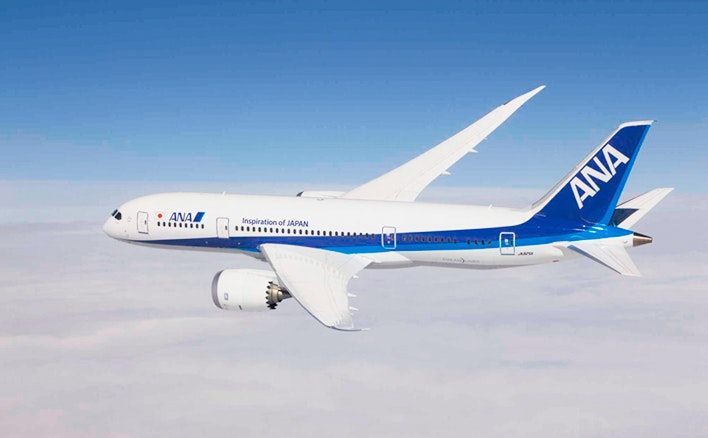

In [ ]:
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array, load_img

#画像読み込み
temp_img=load_img("./airplane.jpeg",target_size=(32,32))

#画像を配列に変換し0-1で正規化
temp_img_array=img_to_array(temp_img)
temp_img_array=temp_img_array.astype('float32')/255.0
temp_img_array=temp_img_array.reshape((1,32,32,3))

#学習済みのモデルと重みを読み込む
json_string=open('cifar10_cnn.json').read()
model=model_from_json(json_string)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.load_weights('cifar10_cnn.h5')

#モデルを表示
model.summary()

#画像を予想
img_pred=model.predict_classes(temp_img_array)
print('\npredict_classes=',img_pred)

plt.imshow(temp_img)
plt.title('pred:{}'.format(img_pred))
plt.show()

どうやら、正しく判定できたようだ。

##課題
##上記のコードの読み込み画像を変え、正しく出力されるかみてみよう。


In [ ]:
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array, load_img

#画像読み込み
temp_img=load_img("./please edit by yourself",target_size=(32,32))

#画像を配列に変換し0-1で正規化
temp_img_array=img_to_array(temp_img)
temp_img_array=temp_img_array.astype('float32')/255.0
temp_img_array=temp_img_array.reshape((1,32,32,3))

#学習済みのモデルと重みを読み込む
json_string=open('cifar10_cnn.json').read()
model=model_from_json(json_string)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.load_weights('cifar10_cnn.h5')

#モデルを表示
model.summary()

#画像を予想
img_pred=model.predict_classes(temp_img_array)
print('\npredict_classes=',img_pred)

plt.imshow(temp_img)
plt.title('pred:{}'.format(img_pred))
plt.show()